In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
orders_link = 'https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/data/orders.csv'
customers_link = 'https://github.com/anyoneai/notebooks/blob/main/customers_and_orders/data/customers.csv'

In [3]:
df = pd.read_csv(orders_link,delimiter=',')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29294 entries, 0 to 29293
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   29294 non-null  int64  
 1   OrderID      29294 non-null  int64  
 2   Date         27152 non-null  object 
 3   OrderTotal   29294 non-null  float64
 4   ProductName  29294 non-null  object 
 5   Price        29294 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.3+ MB


In [5]:
# See some nulls in "Date"
df.head()

,CustomerID,OrderID,Date,OrderTotal,ProductName,Price
0,8091,7742581,2021-07-26 14:40:10.783,95.0,Z03,90.0
1,902139,7742778,2021-08-08 05:01:21.120,60.0,0844 A/C,60.0
2,2300266,7742593,2021-07-27 11:00:16.020,185.0,M07,90.0
3,2300266,7742593,2021-07-27 11:00:16.020,185.0,M09,90.0
4,5173013,7742609,2021-07-28 14:26:13.930,165.0,0324,160.0


In [6]:
# Separate the feature "Date" in Year,Month and Day to get more details

df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [7]:
df.head()

,CustomerID,OrderID,Date,OrderTotal,ProductName,Price,year,month,day
0,8091,7742581,2021-07-26 14:40:10.783,95.0,Z03,90.0,2021.0,7.0,26.0
1,902139,7742778,2021-08-08 05:01:21.120,60.0,0844 A/C,60.0,2021.0,8.0,8.0
2,2300266,7742593,2021-07-27 11:00:16.020,185.0,M07,90.0,2021.0,7.0,27.0
3,2300266,7742593,2021-07-27 11:00:16.020,185.0,M09,90.0,2021.0,7.0,27.0
4,5173013,7742609,2021-07-28 14:26:13.930,165.0,0324,160.0,2021.0,7.0,28.0


In [8]:
# Check the nulls values as %

100 * df.isnull().sum() / len(df)

CustomerID     0.000000
OrderID        0.000000
Date           7.312078
OrderTotal     0.000000
ProductName    0.000000
Price          0.000000
year           7.312078
month          7.312078
day            7.312078
dtype: float64

In [9]:
df[df['Date'].isnull()]

,CustomerID,OrderID,Date,OrderTotal,ProductName,Price,year,month,day
8375,5014,5365,NaN,120.0,211,60.0,NaN,NaN,NaN
8376,5014,5365,NaN,120.0,212,60.0,NaN,NaN,NaN
8377,5068,5329,NaN,120.0,601,60.0,NaN,NaN,NaN
8378,5068,5329,NaN,120.0,601,60.0,NaN,NaN,NaN
8379,5014,5058,NaN,120.0,211,60.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22578,7901,38905,NaN,80.0,3451,80.0,NaN,NaN,NaN
22717,7901,37858,NaN,80.0,3451,80.0,NaN,NaN,NaN
22734,5446,35426,NaN,60.0,3122,60.0,NaN,NaN,NaN
22735,5946,35497,NaN,130.0,PP46,60.0,NaN,NaN,NaN


In [10]:
# Apparently CustomerID is less than 10k and OrderID is less than 50k
# We can try to get the Year and Month, at least, from the number of OrderID ... assuming that they are print by order

In [11]:
# check minimun value to compare
df.groupby('year').min()['OrderID']

year
2005.0      50113
2006.0      53697
2007.0      58256
2008.0    3005476
2009.0    3007877
2010.0    3008456
2011.0    3009321
2012.0    3009651
2013.0    4216994
2014.0    4226063
2015.0    4234398
2016.0    4242514
2017.0    3009862
2018.0    3009933
2019.0    7438663
2020.0    7691860
2021.0    7694580
2022.0    7765854
Name: OrderID, dtype: int64

In [12]:
# check maximum value to compare
df.groupby('year').max()['OrderID']

year
2005.0      50113
2006.0      53697
2007.0      58256
2008.0    3209081
2009.0    3220697
2010.0    4600798
2011.0    4605948
2012.0    4610937
2013.0    5800763
2014.0    6202075
2015.0    6206278
2016.0    7002943
2017.0    7403030
2018.0    7438657
2019.0    7691855
2020.0    7694578
2021.0    7791178
2022.0    7791850
Name: OrderID, dtype: int64

In [13]:
# This OrderID arn´t consecutives... 2014 finished with 6.202.075 and 2015 started with 4.234.398

In [14]:
df[df['Date'].isnull()].nlargest(15,columns='OrderID')

,CustomerID,OrderID,Date,OrderTotal,ProductName,Price,year,month,day
22566,5280,39195,NaN,280.0,GG41,70.0,NaN,NaN,NaN
22567,5280,39195,NaN,280.0,GG42,70.0,NaN,NaN,NaN
11154,5710,39130,NaN,150.0,3526,80.0,NaN,NaN,NaN
19365,5053,39074,NaN,100.0,PP15,100.0,NaN,NaN,NaN
22578,7901,38905,NaN,80.0,3451,80.0,NaN,NaN,NaN
19373,10986,38723,NaN,105.0,Orange # 7,100.0,NaN,NaN,NaN
11187,6194,38327,NaN,145.0,HH83,70.0,NaN,NaN,NaN
11188,6194,38327,NaN,145.0,HH84,70.0,NaN,NaN,NaN
11184,5808,38139,NaN,140.0,H09,70.0,NaN,NaN,NaN
11172,5710,38058,NaN,140.0,3526,80.0,NaN,NaN,NaN


In [15]:
df[df['Date'].isnull()].nlargest(15,columns='CustomerID')

,CustomerID,OrderID,Date,OrderTotal,ProductName,Price,year,month,day
13580,701419,24513,NaN,104.0,HH20,100.0,NaN,NaN,NaN
10281,23898,12749,NaN,150.0,White,50.0,NaN,NaN,NaN
10286,23898,14320,NaN,100.0,White,50.0,NaN,NaN,NaN
10312,23898,11694,NaN,250.0,White,50.0,NaN,NaN,NaN
13659,23898,16780,NaN,150.0,White,50.0,NaN,NaN,NaN
13977,23898,19342,NaN,100.0,White,50.0,NaN,NaN,NaN
13995,23898,17984,NaN,150.0,White,50.0,NaN,NaN,NaN
14700,23898,9666,NaN,50.0,White,50.0,NaN,NaN,NaN
14701,23898,10685,NaN,100.0,White,50.0,NaN,NaN,NaN
11170,19096,37899,NaN,450.0,KK13,60.0,NaN,NaN,NaN


In [16]:
df.groupby('year').median()['CustomerID']

year
2005.0      20850.0
2006.0       9387.0
2007.0       5972.0
2008.0       5851.5
2009.0       5946.0
2010.0       5955.0
2011.0       6177.0
2012.0       6194.0
2013.0       7553.0
2014.0       7812.0
2015.0      11481.0
2016.0      20850.0
2017.0     701419.0
2018.0     900635.0
2019.0     903601.0
2020.0    1901506.0
2021.0    1909700.0
2022.0    5101055.5
Name: CustomerID, dtype: float64

In [17]:
### It´s seems pritty impossible to fill with the right value that´s "Nan" info

In [18]:
# in order to group in some way and dont delete that info...
df = df.fillna(2004)

In [19]:
# Check Nan percentage
100 * df.isnull().sum() / len(df)

CustomerID     0.0
OrderID        0.0
Date           0.0
OrderTotal     0.0
ProductName    0.0
Price          0.0
year           0.0
month          0.0
day            0.0
dtype: float64

In [20]:
# Take a different look to the data to understand better some things...

customers = df['CustomerID'].unique()
print(f'Total customers are: {len(customers)}')
orders = df['OrderID'].unique()
print(f'Total orders are: {len(orders)}')
sku = df['ProductName'].unique()
print(f'Total items are: {len(sku)}')
years = df['year'].unique()
print(f'Total years are : {len(years)}')

Total customers are: 471
Total orders are: 16672
Total items are: 1647
Total years are : 19


So, in the last 19 years the company printed out +16k orders and interacted with almost 500 customers. They sold 1647 differents products.

In [21]:
# Get the best products by quantity sold and amount sold
# Make some "Paretto" to identify the principals sku and work with some model of ML

best_sku = df.groupby('ProductName').count()

In [22]:
best_sku.sort_values(ascending=False,by='OrderID')

,CustomerID,OrderID,Date,OrderTotal,Price,year,month,day
ProductName,,,,,,,,
Vendor ID Card,1067,1067,1067,1067,1067,1067,1067,1067
K28,180,180,180,180,180,180,180,180
R12,179,179,179,179,179,179,179,179
VV06,178,178,178,178,178,178,178,178
H09,177,177,177,177,177,177,177,177
...,...,...,...,...,...,...,...,...
B005,1,1,1,1,1,1,1,1
B007,1,1,1,1,1,1,1,1
B008,1,1,1,1,1,1,1,1


In [23]:
# For what 'vendor card is', to identify a customer every time it buy something?
# Isn´t in every order because appears 1067 times... Lets see a bit more

Vendor_card = df[df['ProductName'] == 'Vendor ID Card']

In [24]:
Vendor_card['Price'].unique()

array([10.])

In [25]:
Vendor_card.groupby('year').sum()['OrderTotal']

year
2010.0     340.0
2011.0    4535.0
2012.0    1435.0
2013.0    1390.0
2014.0    2420.0
2015.0    2415.0
2016.0    2175.0
2017.0    1655.0
2018.0    1575.0
2019.0    1320.0
2020.0     455.0
2021.0    2355.0
2022.0     170.0
Name: OrderTotal, dtype: float64

In [26]:
# OrderTotal repeats rows because the sum is greater than 1067*10 and there is not other SKU in "Vendor_Card" DataFrame

In [27]:
# Drop that item to determinate "best sku" again
df1 = df[df['ProductName'] != 'Vendor ID Card']

In [28]:
best_sku_qty = df1.groupby('ProductName').count()

In [29]:
best_sku_amount = df1.groupby('ProductName').sum()

In [30]:
best_sku_amount = best_sku_amount.nlargest(150,columns='Price')['Price']

In [31]:
list_sku_amount = list((best_sku_amount.nlargest(150).index))
list_sku_qty = list((best_sku_qty.nlargest(150,columns='Price').index))

new_list = list_sku_qty + list_sku_amount

In [32]:
resultantList = []
for element in new_list:
    if element not in resultantList:
        resultantList.append(element)

In [33]:
len(resultantList)

177

In [34]:
# 177 items are the best taking Price (amount) and Repetitions (quantity)

Skudf = df[df['ProductName'].isin(resultantList)]

In [35]:
Skudf.groupby('year').sum()['Price']

year
2004.0    100580.0
2008.0     16170.0
2009.0     74240.0
2010.0     86050.0
2011.0     91155.0
2012.0    103410.0
2013.0    111440.0
2014.0    131230.0
2015.0    151475.0
2016.0    162910.0
2017.0    174685.0
2018.0    185370.0
2019.0    189685.0
2020.0     45610.0
2021.0    113340.0
2022.0     16180.0
Name: Price, dtype: float64

In [36]:
df.groupby('year').sum()['Price']

year
2004.0    145765.0
2005.0       260.0
2006.0       125.0
2007.0         5.0
2008.0     20450.0
2009.0    106230.0
2010.0    119795.0
2011.0    128790.0
2012.0    145575.0
2013.0    154870.0
2014.0    171225.0
2015.0    187750.0
2016.0    207845.0
2017.0    242340.0
2018.0    272195.0
2019.0    324495.0
2020.0     90225.0
2021.0    384428.0
2022.0     96665.0
Name: Price, dtype: float64

In [37]:
# Take a look the differences of "Price" a long the years
df[df['ProductName'] == 'K28'].describe()

,CustomerID,OrderID,OrderTotal,Price,year,month,day
count,180.0,1.800000e+02,180.000000,180.000000,180.000000,180.000000,180.000000
mean,5889.0,4.801511e+06,245.566667,116.166667,2012.877778,328.283333,332.833333
std,0.0,2.558205e+06,124.511250,4.875546,5.215636,736.419408,734.425953
min,5889.0,5.870000e+03,110.000000,110.000000,2004.000000,1.000000,2.000000
25%,5889.0,3.222254e+06,110.000000,110.000000,2010.000000,4.000000,9.000000
50%,5889.0,4.612567e+06,240.000000,120.000000,2013.000000,8.000000,12.000000
75%,5889.0,7.003067e+06,360.000000,120.000000,2017.000000,12.000000,17.000000
max,5889.0,7.791850e+06,660.000000,120.000000,2022.000000,2004.000000,2004.000000


In [38]:
df[df['ProductName'] == 'HH26'].describe()

,CustomerID,OrderID,OrderTotal,Price,year,month,day
count,148.0,1.480000e+02,148.000000,148.000000,148.000000,148.000000,148.000000
mean,701419.0,5.287330e+06,290.797297,92.567568,2014.513514,6.540541,14.885135
std,0.0,1.679075e+06,102.087795,16.418076,3.687608,3.458950,8.090915
min,701419.0,3.006761e+06,160.000000,80.000000,2008.000000,1.000000,1.000000
25%,701419.0,4.211182e+06,223.750000,80.000000,2011.000000,4.000000,9.000000
50%,701419.0,4.237917e+06,325.000000,80.000000,2014.000000,7.000000,14.000000
75%,701419.0,7.403386e+06,325.000000,110.000000,2017.250000,10.000000,22.000000
max,701419.0,7.791475e+06,535.000000,120.000000,2022.000000,12.000000,31.000000


In [39]:
df[df['ProductName'] == 'GG10'].describe()

,CustomerID,OrderID,OrderTotal,Price,year,month,day
count,169.0,1.690000e+02,169.000000,169.000000,169.000000,169.000000,169.000000
mean,7553.0,5.036650e+06,274.076923,115.266272,2013.207101,254.579882,258.550296
std,0.0,2.405092e+06,79.962863,7.076545,4.923070,660.947278,659.447233
min,7553.0,1.505500e+04,110.000000,100.000000,2004.000000,1.000000,1.000000
25%,7553.0,3.226625e+06,240.000000,110.000000,2010.000000,4.000000,9.000000
50%,7553.0,5.800349e+06,240.000000,120.000000,2014.000000,7.000000,12.000000
75%,7553.0,7.005033e+06,245.000000,120.000000,2017.000000,11.000000,14.000000
max,7553.0,7.791607e+06,520.000000,120.000000,2022.000000,2004.000000,2004.000000


In [40]:
# Looking thats products I can conclude the prices increments by the time

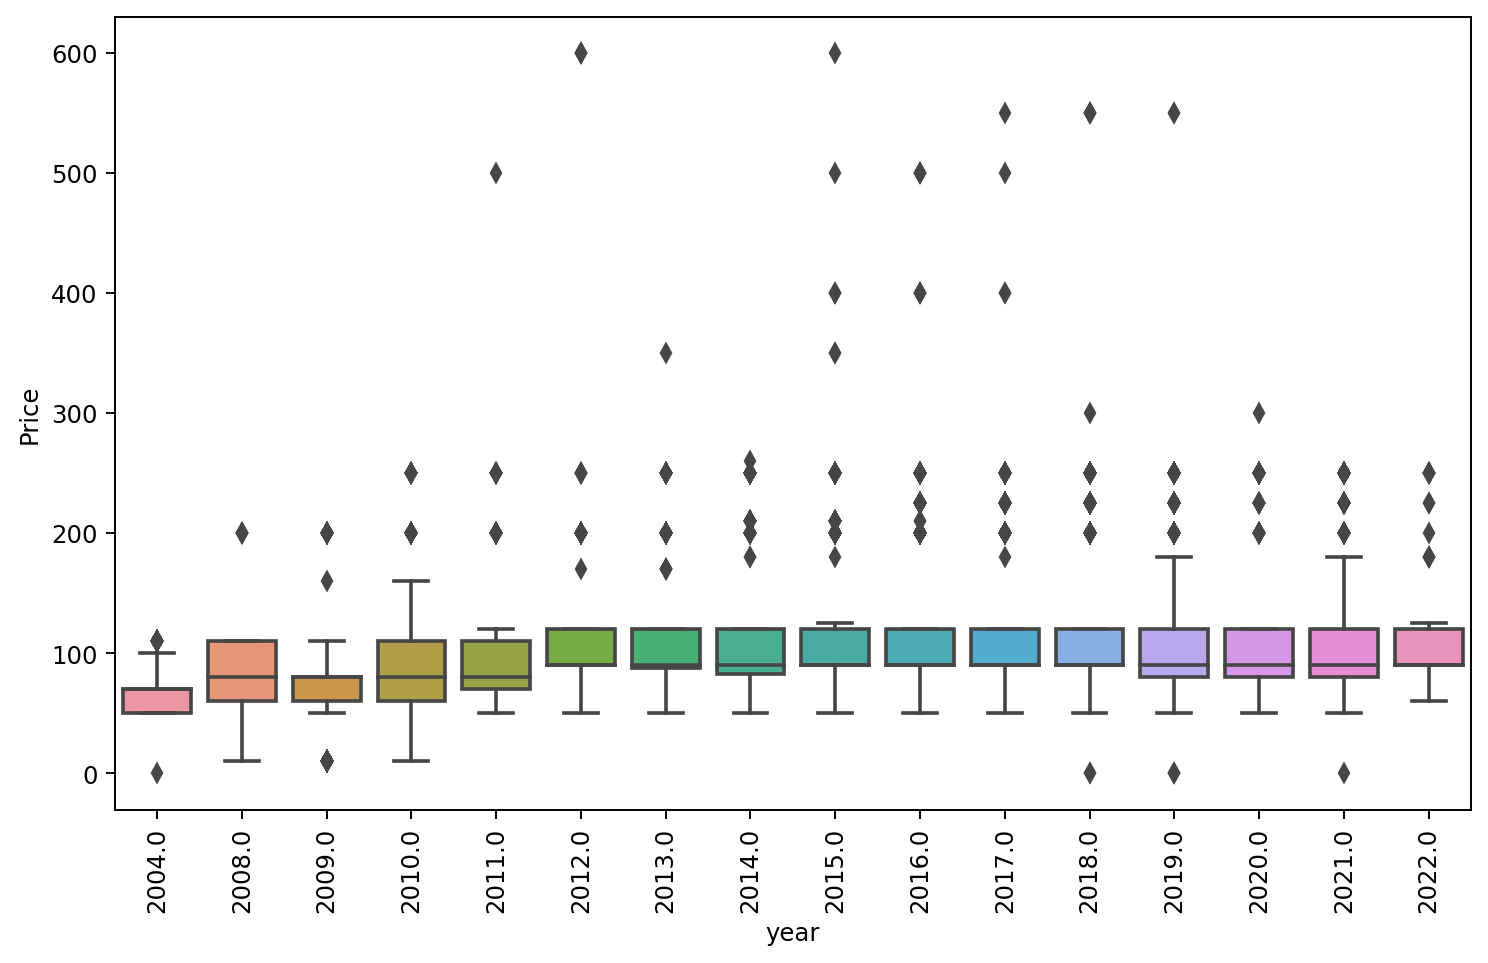

In [41]:
plt.figure(figsize=(10,6),dpi=175)
sns.boxplot(data=Skudf, x='year', y='Price')
plt.xticks(rotation=90);

In [42]:
# Despite of the fluctuation of prices in time, these are pretty stable

In [43]:
# create a new dataframe to predict sales in 2022

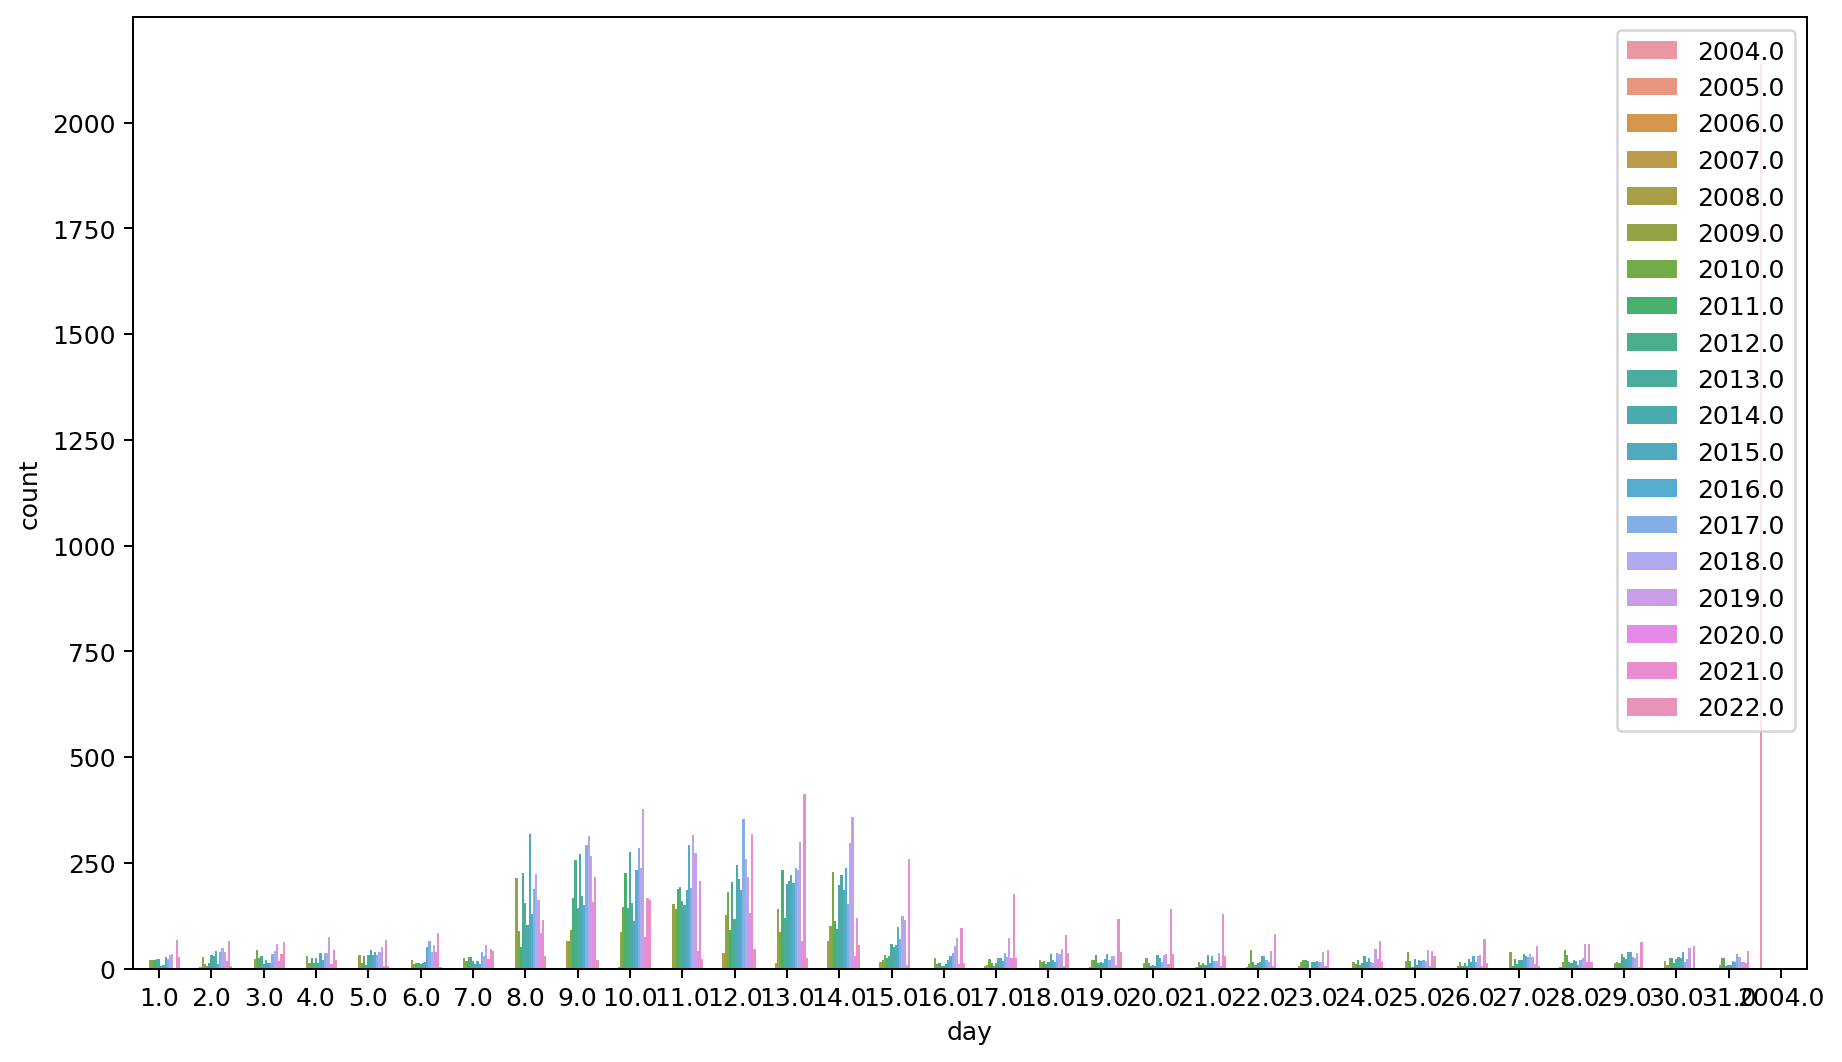

In [45]:
plt.figure(figsize=(12,7),dpi=180)
sns.countplot(data=df,x='day',hue='year')
plt.legend(loc='upper right')
# Best day for Sell
# Dont look 2004 because it´s all the Nan values

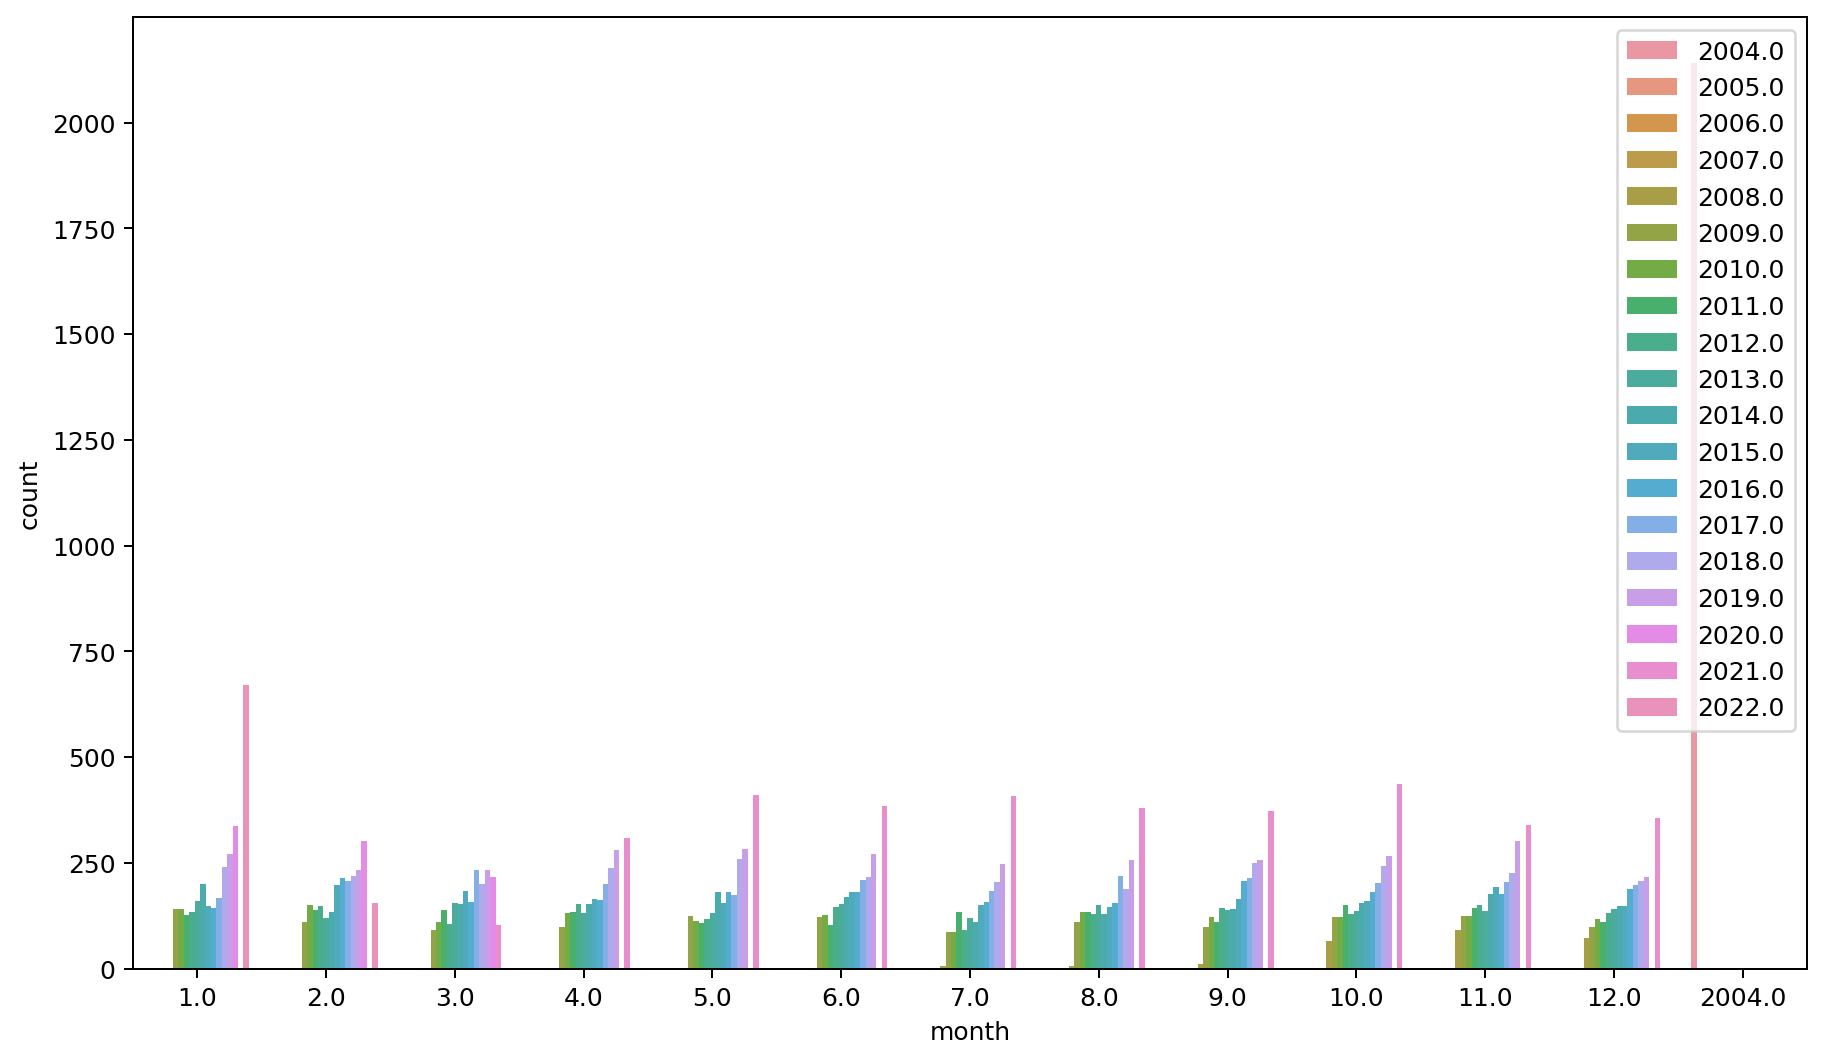

In [46]:
plt.figure(figsize=(12,7),dpi=180)
sns.countplot(data=df,x='month',hue='year')
plt.legend(loc='upper right')

In [47]:
df[df['year'] == 2020]

,CustomerID,OrderID,Date,OrderTotal,ProductName,Price,year,month,day
1411,1905150,7691881,2020-01-03 14:01:22.130,245.0,8035,120.0,2020.0,1.0,3.0
1412,1905150,7691881,2020-01-03 14:01:22.130,245.0,8035,120.0,2020.0,1.0,3.0
1413,5172086,7691909,2020-01-06 08:52:24.080,105.0,0416,100.0,2020.0,1.0,6.0
1414,703804,7691918,2020-01-06 09:38:14.343,260.0,GG07,250.0,2020.0,1.0,6.0
1415,5173415,7691957,2020-01-06 14:26:28.360,95.0,3832,90.0,2020.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...
8995,5100984,7694549,2020-03-11 16:59:30.400,500.0,0105,250.0,2020.0,3.0,11.0
8996,5100984,7694549,2020-03-11 16:59:30.400,500.0,0107,250.0,2020.0,3.0,11.0
8997,903601,7694559,2020-03-11 19:03:33.940,350.0,F01,250.0,2020.0,3.0,11.0
8998,903601,7694559,2020-03-11 19:03:33.940,350.0,F03,90.0,2020.0,3.0,11.0


In [48]:
# Maybe I can predict the sales on January 2022
# Prepare DataFrame: 